In [3]:
import numpy as np
import datetime
import netCDF4
import gsw
#-------------------------------------------------------------------------|
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.colors as colors
import cmocean
import cmocean.cm as cmo
#-------------------------------------------------------------------------|
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from scipy.io import loadmat
import xarray as xr
import math
import h5py
import pandas as pd
import re
from pathlib import Path
import os
import numpy.ma as ma
###############################
from pyresample import kd_tree, geometry, utils
from pyresample.geometry import GridDefinition
import pyproj as pyproj
from  pyproj import transform
from pyproj import Proj
# may make plotting faster
pyproj.set_use_global_context()
###############################
import sys
sys.path.append(r'/Users/houndegno/Documents/JupyterNoteBook/Prog/odi')
import odi
#-------------------------------------------------------------------------|
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
# selection location in the Beaufort Sea
lonB = -145.98#-150
latB = 73.18#70.5

In [5]:
openmefrom = '/Users/houndegno/Documents/MATLAB/Data/SASSIE_DATA/MITgcm_experiments/1D_OJH/1D_ocean_ice_column/run/inputForcing/'
IceFrac = np.fromfile(openmefrom+'icefrac_four_months.bin', '>f4')

In [6]:
from pathlib import Path

In [7]:
rep =Path('/Users/houndegno/Documents/MATLAB/Data/SASSIE_DATA/MITgcm_experiments/1D_OJH/1D_ocean_ice_column/run/mnc_test_0016/')

In [8]:
files = np.sort(list(rep.glob('*nc')))
for f in files:
    print(f.name)

EXF_avg_daily.0000000000.t001.nc
EXF_net_avg_daily.0000000000.t001.nc
ICE_avg_daily.0000000000.t001.nc
ICE_avg_daily_2.0000000000.t001.nc
ICE_avg_daily_3.0000000000.t001.nc
ICE_avg_daily_4.0000000000.t001.nc
ICE_avg_daily_qnet.0000000000.t001.nc
KPP_avg_daily.0000000000.t001.nc
Main_3D_avg_daily.0000000000.t001.nc
grid.t001.nc
monitor_grid.0000000000.t001.nc
phiHyd.0000000000.t001.nc
phiHydLow.0000000000.t001.nc
sice.0000000000.t001.nc
state.0000000000.t001.nc


In [9]:
File = 'state.0000000000.t001.nc'

In [10]:
File2 = 'sice.0000000000.t001.nc'

In [11]:
File3 = 'kpp_state.0000000000.t001.nc'

In [12]:
f = rep / 'ICE_avg_daily.0000000000.t001.nc'
exf_1 = rep / "EXF_avg_daily.0000000000.t001.nc"
exf_2 = rep / "EXF_net_avg_daily.0000000000.t001.nc"
siqnet = rep / "ICE_avg_daily_qnet.0000000000.t001.nc"
print(f)

/Users/houndegno/Documents/MATLAB/Data/SASSIE_DATA/MITgcm_experiments/1D_OJH/1D_ocean_ice_column/run/mnc_test_0016/ICE_avg_daily.0000000000.t001.nc


In [13]:
ds_exf_1 = xr.open_dataset(exf_1)
ds_exf_2 = xr.open_dataset(exf_2)
ds_siqnet_2 = xr.open_dataset(siqnet)

In [14]:
ds_siqnet_2

<xarray.Dataset>
Dimensions:      (T: 133, Zmd000001: 1, X: 1, Y: 1, Zd000001: 1)
Coordinates:
  * T            (T) datetime64[ns] 2022-09-18 2022-09-19 ... 2023-01-28
  * X            (X) float64 2.5e+03
  * Y            (Y) float64 2.5e+03
Dimensions without coordinates: Zmd000001, Zd000001
Data variables:
    iter         (T) int32 ...
    diag_levels  (Zmd000001) float64 ...
    SIqnet       (T, Zd000001, Y, X) float32 ...
    SIqsw        (T, Zd000001, Y, X) float32 ...
    SIqneto      (T, Zd000001, Y, X) float32 ...
    SIqneti      (T, Zd000001, Y, X) float32 ...
Attributes: (12/20)
    MITgcm_version:  checkpoint66g
    build_host:      389c2bb8382c
    build_date:      Fri Nov 10 00:33:14 UTC 2023
    MITgcm_URL:      http://mitgcm.org
    MITgcm_tag_id:   1.2326 2017/04/24
    MITgcm_mnc_ver:  0.9
    ...              ...
    nSy:             1
    nPx:             1
    nPy:             1
    Nx:              1
    Ny:              1
    Nr:              70

iter
diag_levels
EXFuwind
EXFvwind
EXFlwdn
EXFswdn
EXFatemp
EXFaqh
EXFevap
EXFpreci
EXFempmr
EXFhl
EXFhs
iter
diag_levels
EXFqnet
EXFswnet
EXFlwnet
iter
diag_levels
SIqnet
SIqsw
SIqneto
SIqneti


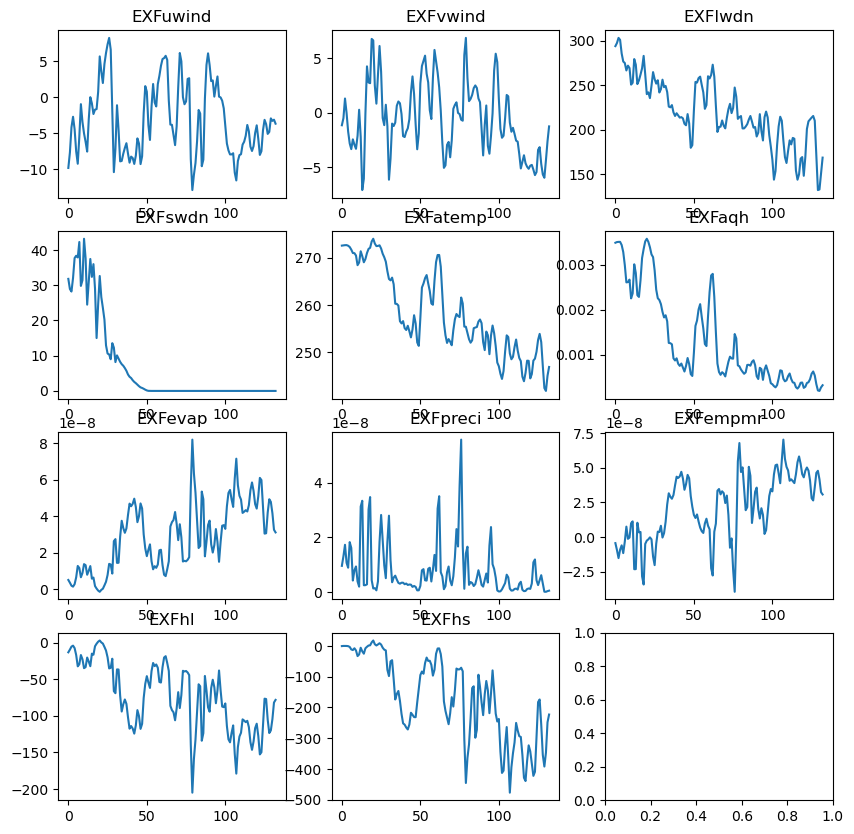

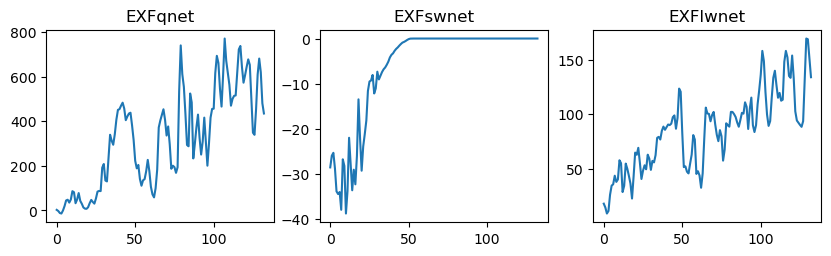

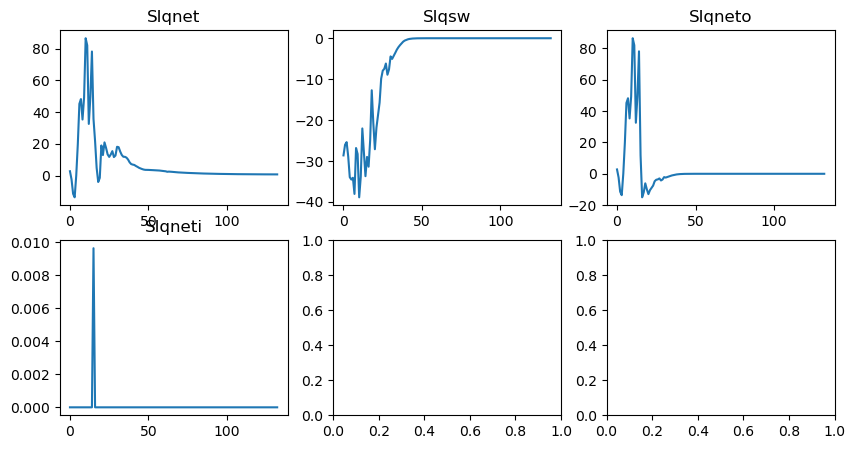

In [15]:
f,ax=plt.subplots(4,3,figsize=[10,10])
axs = ax.ravel()
fc = 0
for field in ds_exf_1.data_vars:
    print(field)
    if 'EXF' in field:
        axs[fc].plot(np.ravel(ds_exf_1[field][:,0]))
        axs[fc].set_title(field)
        fc += 1
        
f,ax=plt.subplots(1,3,figsize=[10,2.5])
axs = ax.ravel()
fc = 0
for field in ds_exf_2.data_vars:
    print(field)
    if 'EXF' in field:
        axs[fc].plot(np.ravel(ds_exf_2[field][:,0]))
        axs[fc].set_title(field)
        fc+=1

f,ax=plt.subplots(2,3,figsize=[10,5])
axs = ax.ravel()
fc = 0
for field in ds_siqnet_2.data_vars:
    print(field)
    if 'SI' in field:
        axs[fc].plot(np.ravel(ds_siqnet_2[field][:,0]))
        axs[fc].set_title(field)
        fc+=1        

In [16]:
ds.SIarea.plot()

NameError: name 'ds' is not defined

In [32]:
rep2 = '/Users/houndegno/Documents/MATLAB/Data/SASSIE_DATA/MITgcm_experiments/1D_OJH/1D_ocean_ice_column/run/mnc_test_0005/'

In [33]:
ds = xr.open_dataset(rep2+File)
S = np.squeeze(ds.S)
T = np.squeeze(ds.Temp)
z = ds.Z
t = ds.T
Eta = np.squeeze(ds.Eta)
S

<xarray.DataArray 'S' (T: 134, Z: 70)>
[9380 values with dtype=float32]
Coordinates:
  * T        (T) datetime64[ns] 2022-09-17 2022-09-18 ... 2023-01-27 2023-01-28
    Y        float64 2.5e+03
  * Z        (Z) float64 -0.5 -1.5 -2.5 -3.5 -4.5 ... -66.5 -67.5 -68.5 -69.5
    X        float64 2.5e+03
Attributes:
    long_name:    salinity
    coordinates:  XC YC RC iter

In [34]:
S


<xarray.DataArray 'S' (T: 134, Z: 70)>
[9380 values with dtype=float32]
Coordinates:
  * T        (T) datetime64[ns] 2022-09-17 2022-09-18 ... 2023-01-27 2023-01-28
    Y        float64 2.5e+03
  * Z        (Z) float64 -0.5 -1.5 -2.5 -3.5 -4.5 ... -66.5 -67.5 -68.5 -69.5
    X        float64 2.5e+03
Attributes:
    long_name:    salinity
    coordinates:  XC YC RC iter

In [35]:
# Density compute and N2
SA = gsw.SA_from_SP(S,-z,lonB,latB)
CT = gsw.CT_from_pt(SA,T)
Dens = gsw.density.sigma0(SA, CT)
# MLD comtupe
MLD = np.zeros(t.size)*np.nan
for i in np.arange(t.size):
    MLD[i] = odi.odi_mld_montegut(S[i,:],T[i,:],-z,lonB,latB,n='PT')

In [36]:
N2Z = np.ones([z.size-1,t.size])
# N2 compute
for i in np.arange(t.size):
    N2Z[:,i],Zn2 = gsw.Nsquared(SA[i,:],CT[i,:],-z,latB)

In [37]:
N2Z.shape

(69, 134)

In [38]:
N2max = np.ones(t.size)
for i in np.arange(t.size):
    N2max[i] = max(N2Z[:,i])

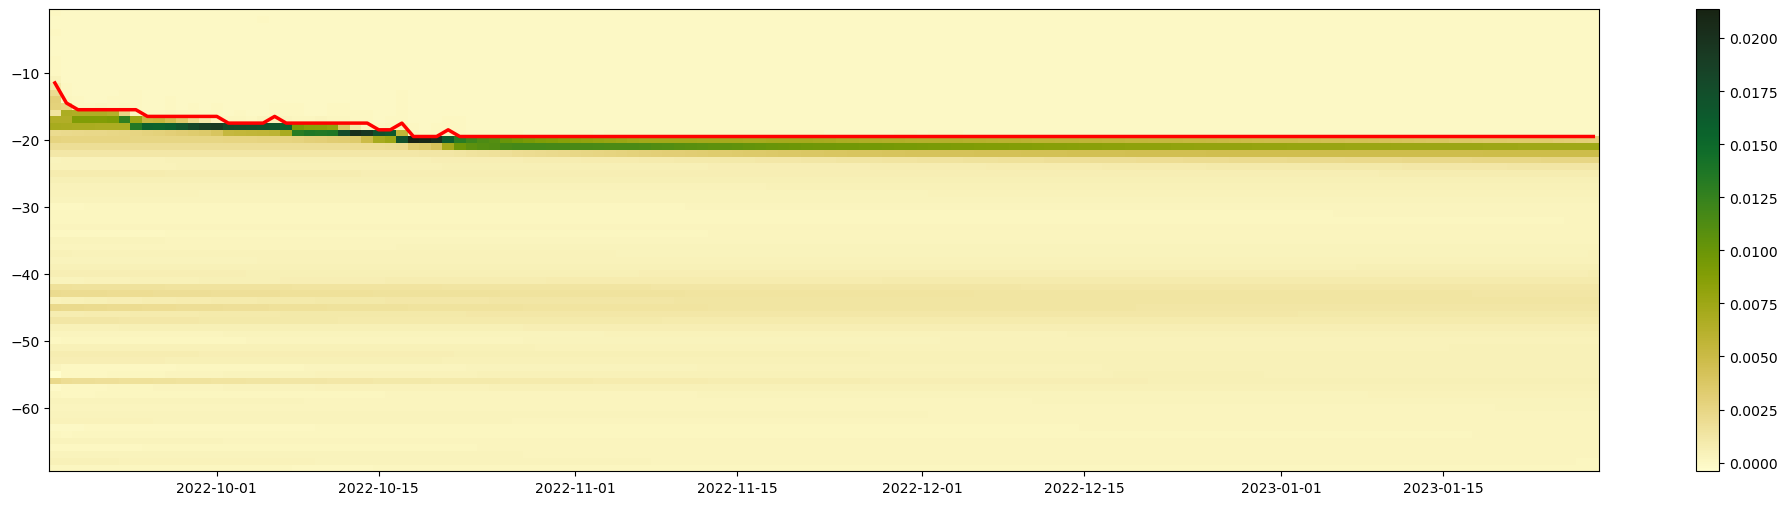

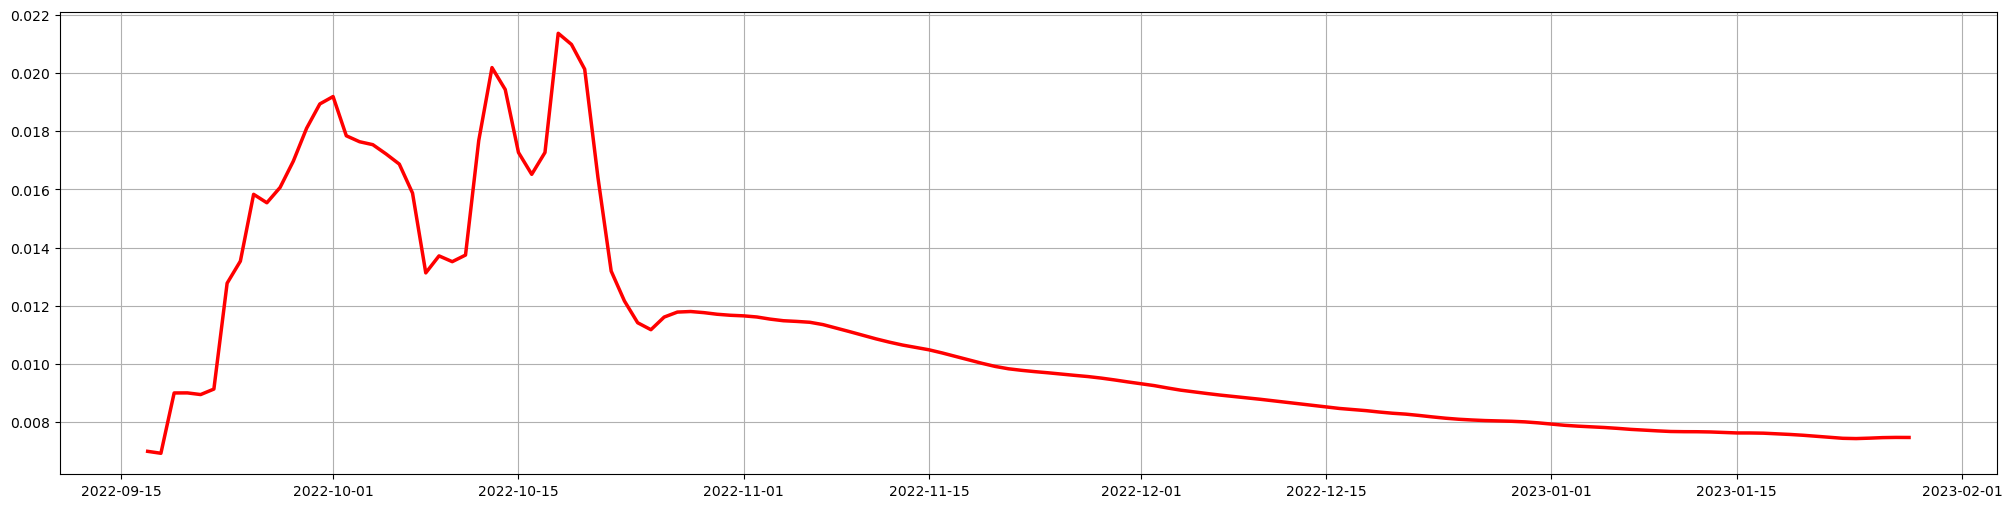

In [39]:
fig = plt.figure(figsize=[25,6], num=1);plt.clf();
cb = plt.pcolormesh(t,-Zn2,N2Z,cmap='cmo.speed')
plt.colorbar(cb)
plt.plot(t,-MLD,'-r',label='MLD',linewidth=2.5)
fig = plt.figure(figsize=[25,6], num=2);plt.clf();
plt.plot(t,N2max,'-r',label='MLD',linewidth=2.5)
plt.grid()

In [40]:
# compute in situ temperature from CT
InsituTem = gsw.t_from_CT(SA,CT,-z)

In [41]:
# compute Heat content
cp = gsw.cp_t_exact(SA,InsituTem,-z)

In [42]:
OHC = np.sum(Dens*cp*T,axis=1)

In [43]:
help(gsw.cp_t_exact)

Help on function cp_t_exact in module gsw._wrapped_ufuncs:

cp_t_exact(SA, t, p)
    Calculates the isobaric heat capacity of seawater.
    
    Parameters
    ----------
    SA : array-like
        Absolute Salinity, g/kg
    t : array-like
        In-situ temperature (ITS-90), degrees C
    p : array-like
        Sea pressure (absolute pressure minus 10.1325 dbar), dbar
    
    Returns
    -------
    cp_t_exact : array-like, J/(kg*K)
        heat capacity of seawater



In [347]:
#np.array(z)

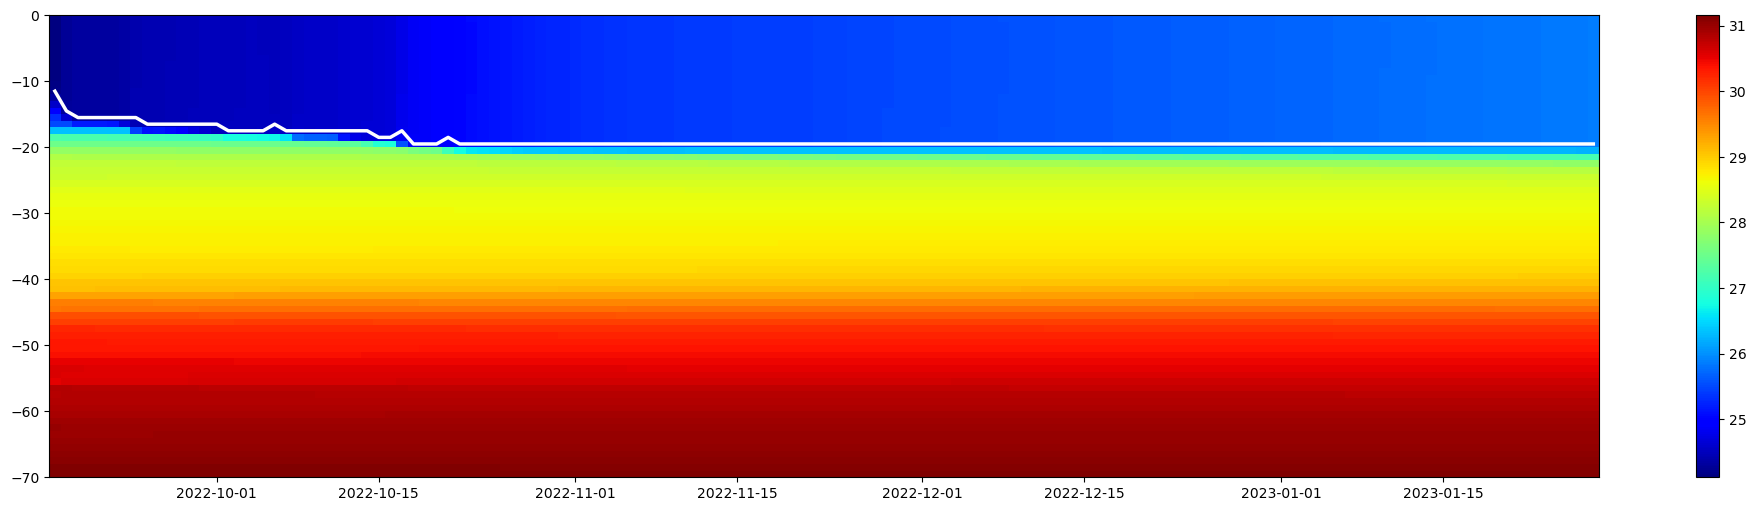

In [44]:
fig = plt.figure(figsize=[25,6], num=2);plt.clf();
#cb = plt.pcolormesh(t[ti],z[igood],S[ti,igood].T,cmap='jet')#cmo.haline')
cb = plt.pcolormesh(t,z,S.T,cmap='jet')#cmo.haline')
plt.colorbar(cb)
plt.plot(t,-MLD,'-w',label='MLD',linewidth=2.5)

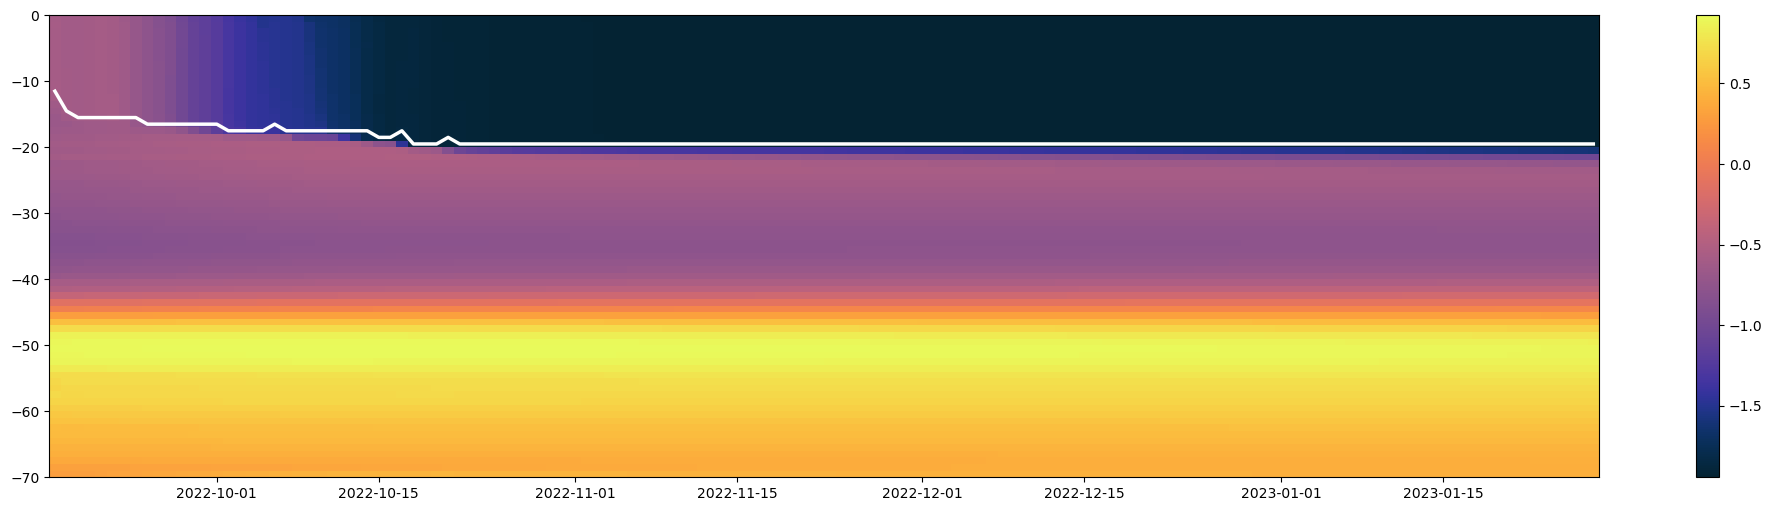

In [45]:
fig = plt.figure(figsize=[25,6], num=2);plt.clf();
cb = plt.pcolormesh(t,z,T.T,cmap='cmo.thermal')
#plt.contour(t[ti],z[igood],T[ti,igood].T)
plt.colorbar(cb)
plt.plot(t,-MLD,'-w',label='MLD',linewidth=2.5)

In [46]:
fig = plt.figure(figsize=[25,6], num=1);plt.clf();
S[ti,igood].T.plot(cmap='cmo.haline')
plt.plot(t,-MLD,'-w',label='MLD',linewidth=2.5)
fig = plt.figure(figsize=[25,6], num=2);plt.clf();
T[ti,igood].T.plot(cmap='cmo.thermal')
plt.plot(t,-MLD,'-w',label='MLD',linewidth=2.5)

NameError: name 'ti' is not defined

<Figure size 2500x600 with 0 Axes>

In [49]:
ds2 = xr.open_dataset(rep2+File2)
ds2

<xarray.Dataset>
Dimensions:     (T: 134, Xp1: 2, Y: 1, X: 1, Yp1: 2)
Coordinates:
  * T           (T) datetime64[ns] 2022-09-17 2022-09-18 ... 2023-01-28
  * Xp1         (Xp1) float64 0.0 5e+03
  * Y           (Y) float64 2.5e+03
  * X           (X) float64 2.5e+03
  * Yp1         (Yp1) float64 0.0 5e+03
Data variables: (12/13)
    iter        (T) int32 ...
    model_time  (T) float64 ...
    si_UICE     (T, Y, Xp1) float32 ...
    si_VICE     (T, Yp1, X) float32 ...
    si_HEFF     (T, Y, X) float32 ...
    si_AREA     (T, Y, X) float32 ...
    ...          ...
    si_VWIND    (T, Yp1, X) float32 ...
    fu          (T, Y, Xp1) float32 ...
    fv          (T, Yp1, X) float32 ...
    EmPmR       (T, Y, X) float32 ...
    Qnet        (T, Y, X) float32 ...
    Qsw         (T, Y, X) float32 ...
Attributes: (12/20)
    MITgcm_version:  checkpoint66g
    build_host:      389c2bb8382c
    build_date:      Fri Nov 10 00:33:14 UTC 2023
    MITgcm_URL:      http://mitgcm.org
    MITgcm_tag_id:   1.2326 2017/04/24
    MITgcm_mnc_ver:  0.9
    ...              ...
    nSy:             1
    nPx:             1
    nPy:             1
    Nx:              1
    Ny:              1
    Nr:              70

In [50]:
ice_thik = ds2.si_HEFF
ice_fraction = ds2.si_AREA
Qnet = ds2.Qnet
Qsw = ds2.Qsw
EmPmR = ds2.EmPmR

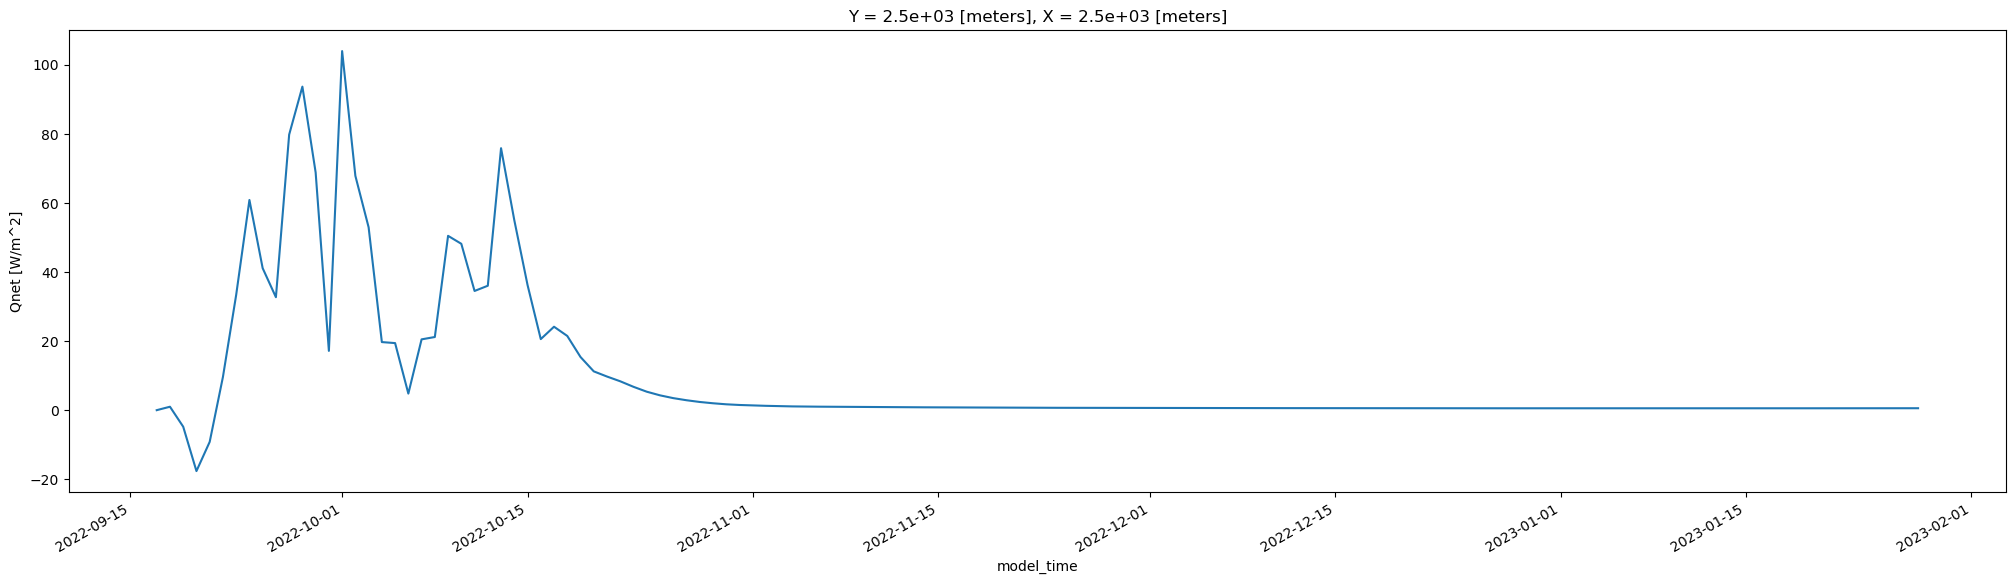

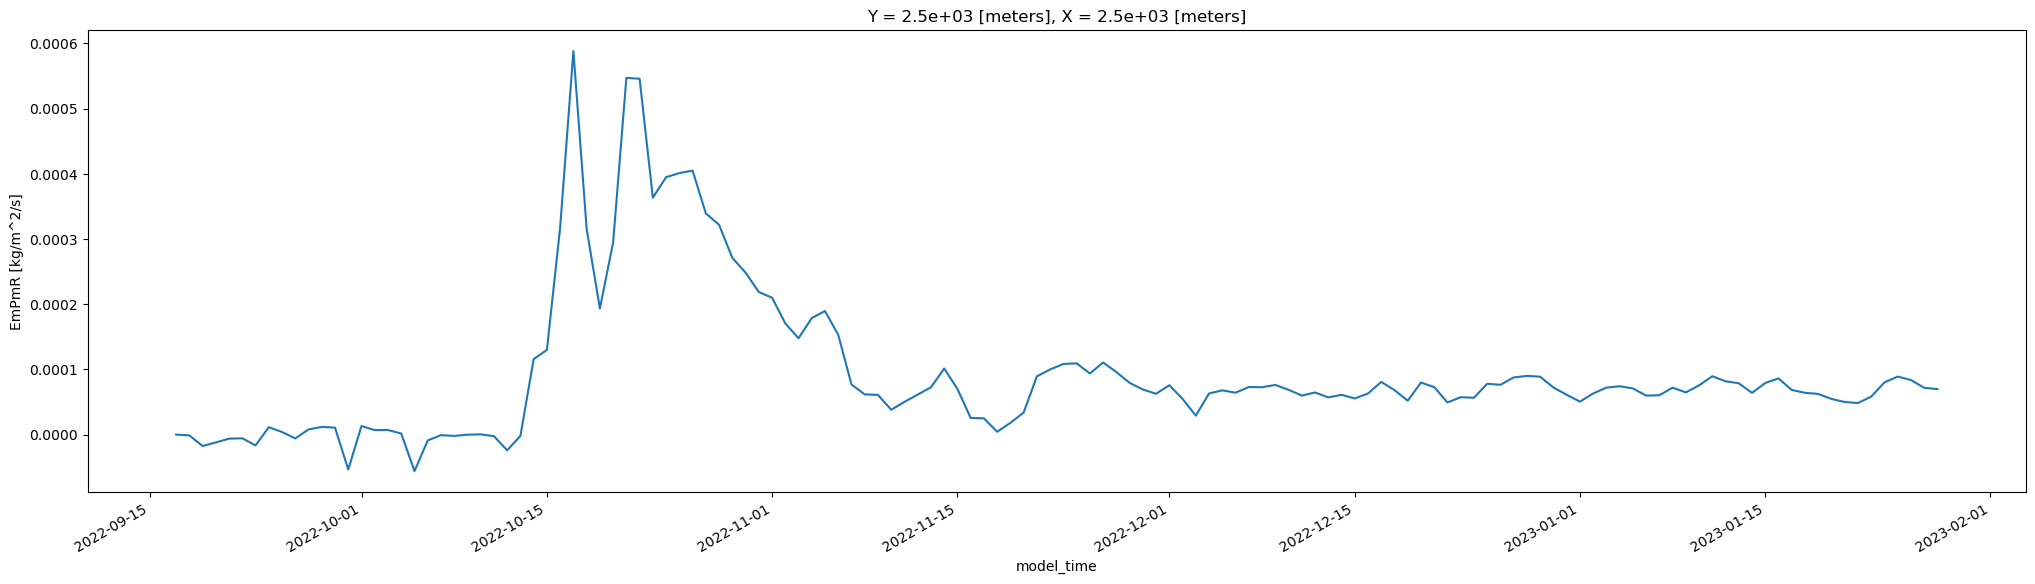

In [51]:
fig = plt.figure(figsize=[25,6], num=1);plt.clf();
Qnet.plot()
fig = plt.figure(figsize=[25,6], num=2);plt.clf();
Qsw.plot()
fig = plt.figure(figsize=[25,6], num=2);plt.clf();
EmPmR.plot()

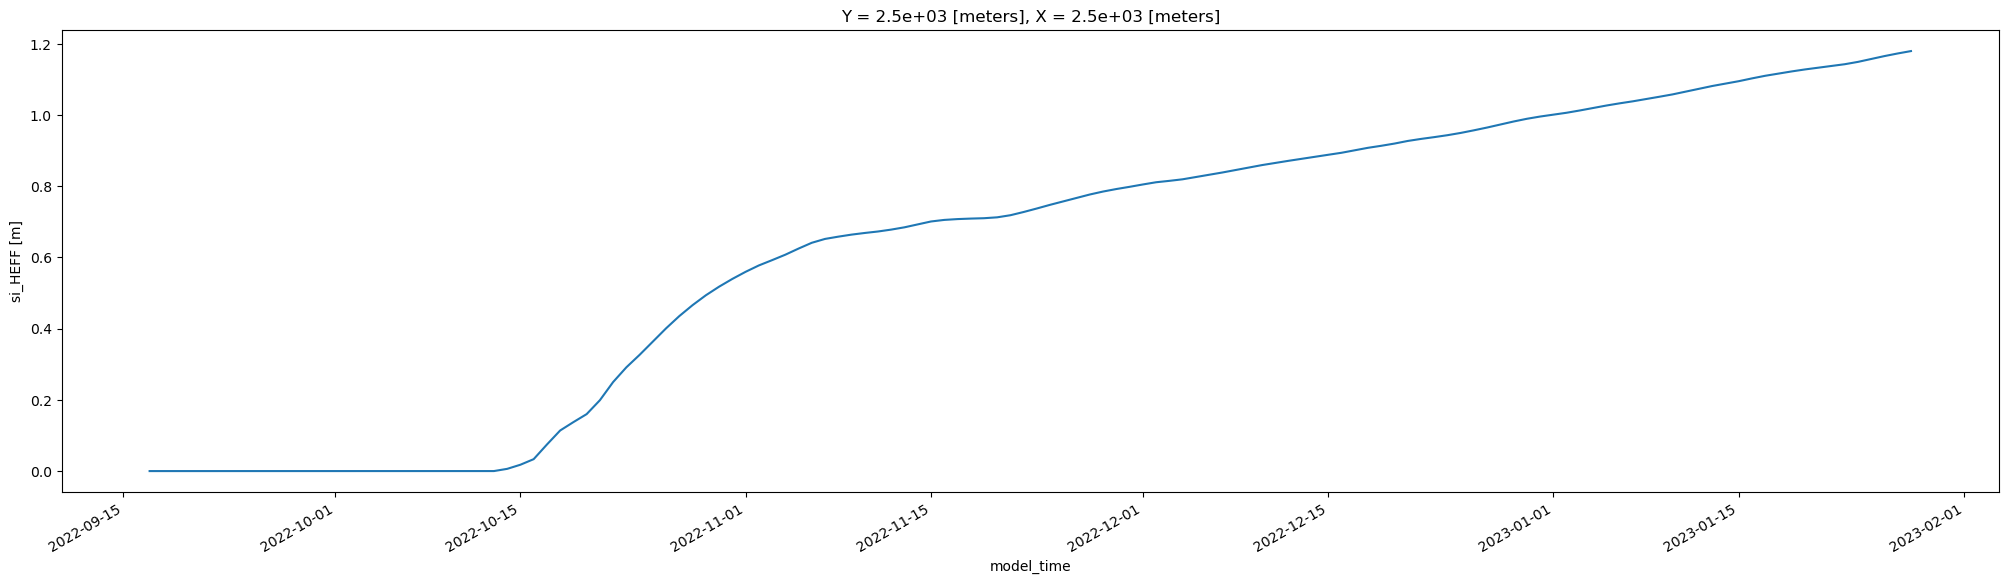

In [52]:
fig = plt.figure(figsize=[25,6], num=1);plt.clf();
ice_thik.plot()

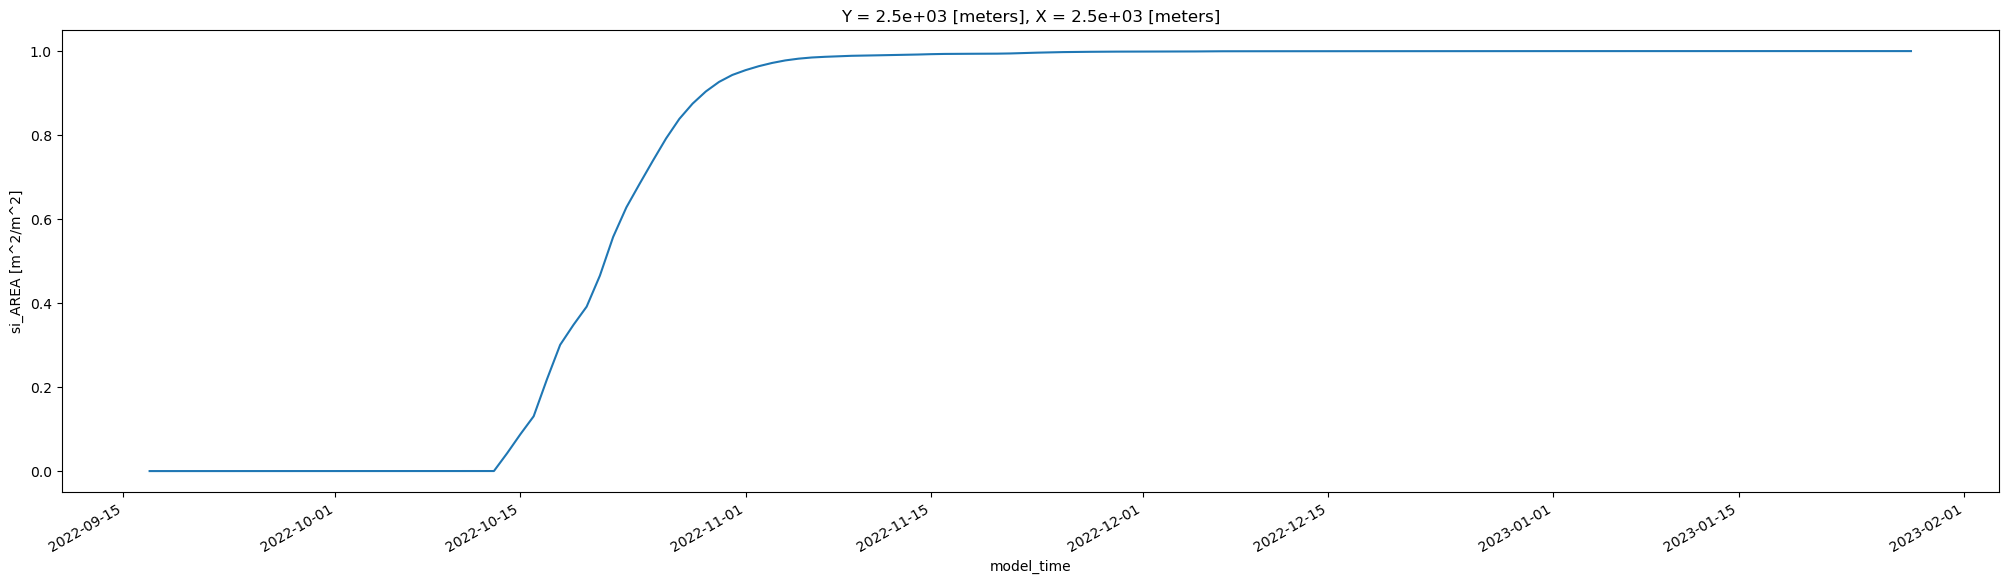

In [53]:
fig = plt.figure(figsize=[25,6], num=1);plt.clf();
ice_fraction.plot()

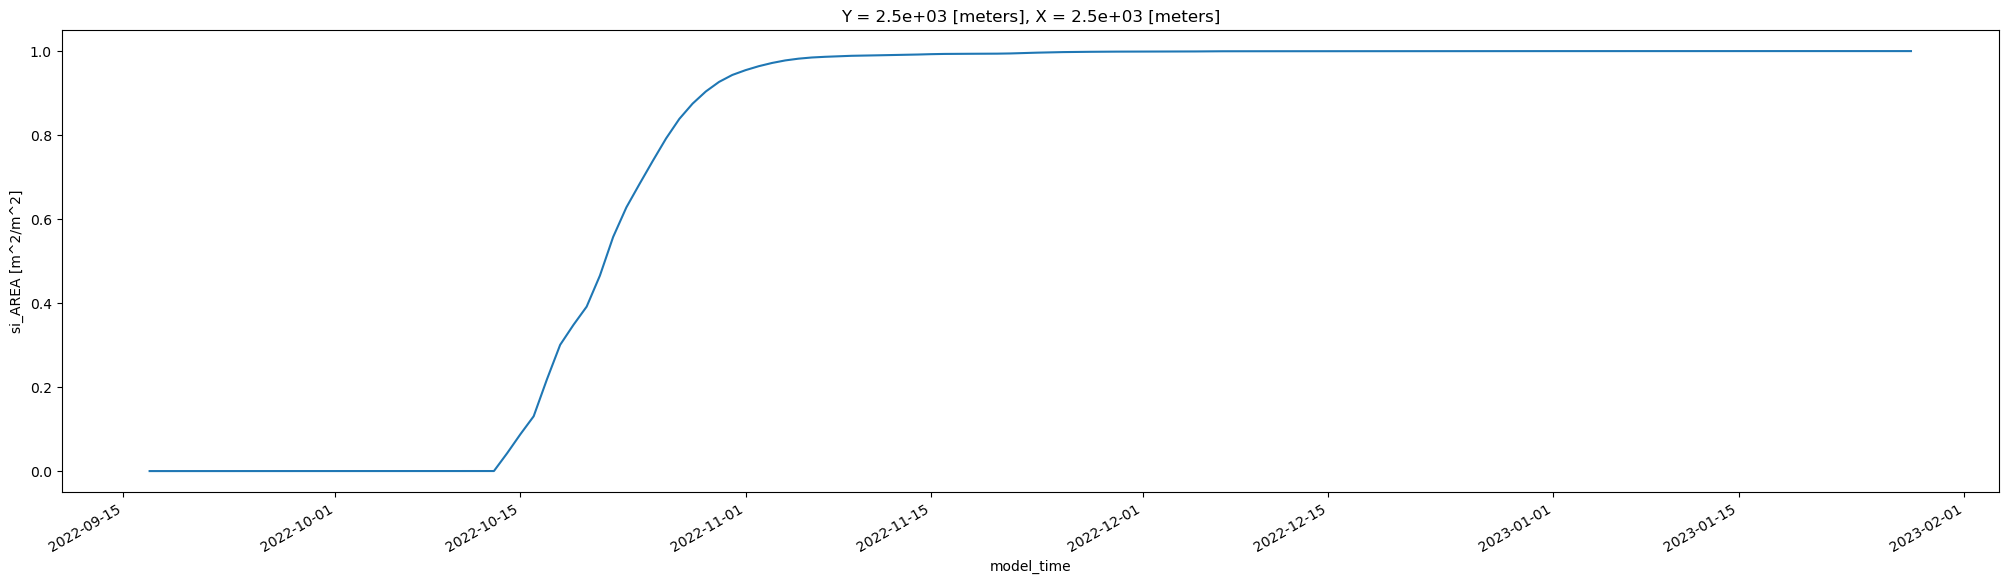

In [54]:
fig = plt.figure(figsize=[25,6], num=1);plt.clf();
ice_fraction.plot()

In [55]:
# time fram selection of ice_fraction starting from 2022-09-17
ti = np.where(t.values.astype('datetime64[s]')>=np.datetime64('2022-09-17','ns'))[0]+16 #the output 
                                                             #start by 2022-09-17 not on 2022-09-01
ti

array([ 16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149])

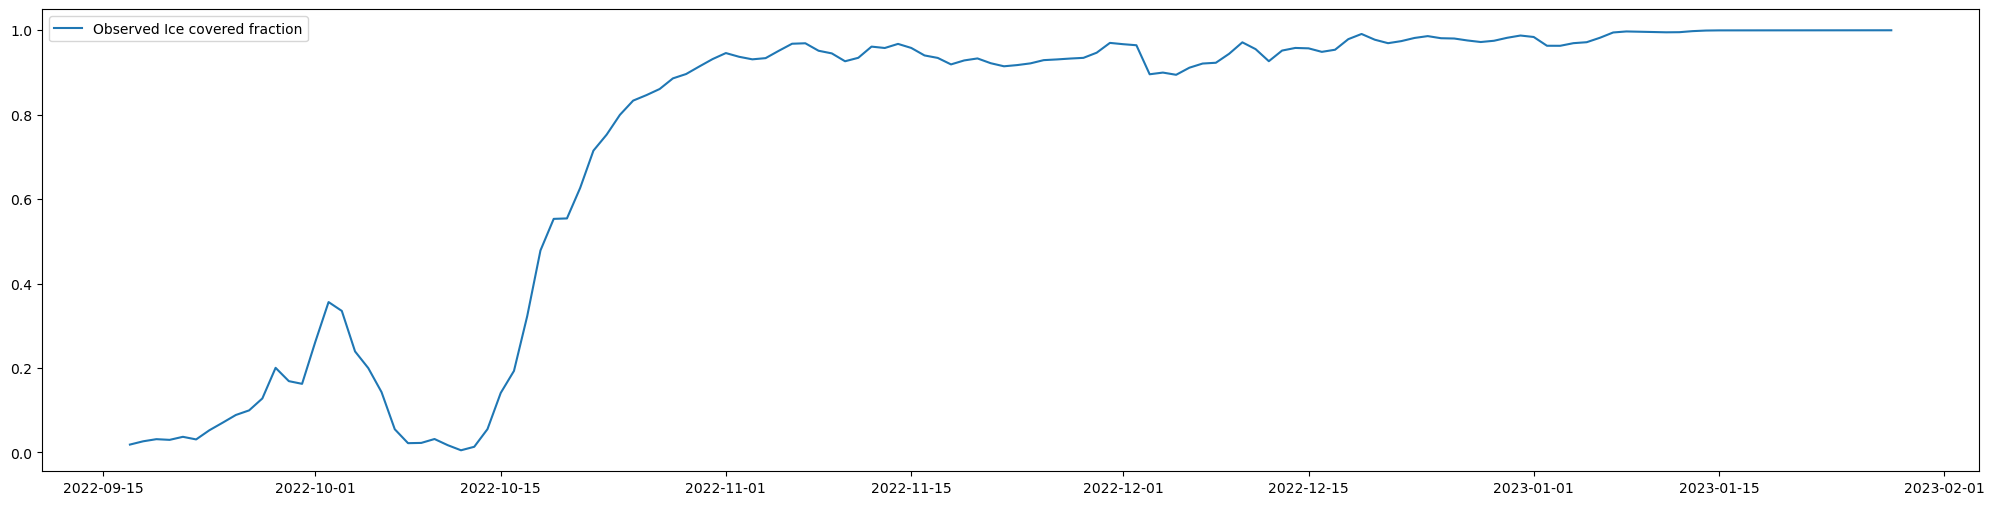

In [56]:
fig = plt.figure(figsize=[25,6], num=1);plt.clf();
plt.plot(t,IceFrac[ti],label='Observed Ice covered fraction')
plt.legend()

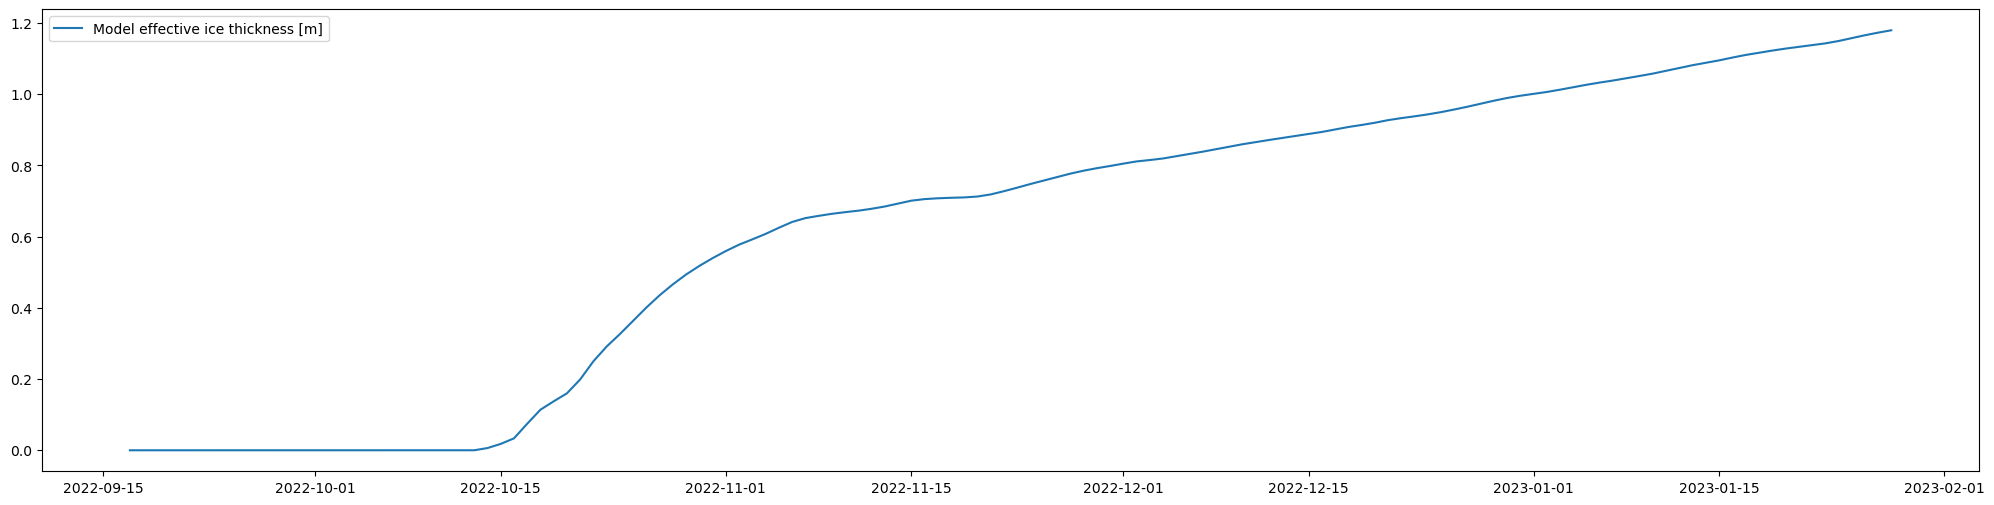

In [57]:
fig = plt.figure(figsize=[25,6], num=1);plt.clf();
plt.plot(t,np.squeeze(ice_thik),label='Model effective ice thickness [m]')
#plt.plot(t[ti],IceFrac[ti],label='Observed Ice covered fraction')
plt.legend()

In [58]:
ice_stick = 0.15
iiceformMode = np.where(np.squeeze(ice_fraction)>0.05)[0][0]-1
iiceformObs  = np.where(IceFrac[ti]>.05)[0][0]

In [59]:
print(iiceformMode,iiceformObs)

27 6


In [60]:
def ice_retreat_form_day(ice_con_array,ice_stick):
    #--------------------------------------------------------------
    ice_freez_days = list([])
    ice_leave_days = list([])
    #--------------------------------------------------------------
    for i in np.arange(ice_fraction.size-5):
        iteralength = np.arange(i+1,i+5+1,1)
        icecheck    = np.ndarray(shape = (5), dtype = float)*0
        iceretreat  = np.ndarray(shape = (5), dtype = float)*0
        for j in np.arange(iteralength.size):
            if (ice_fraction[iteralength[j]])>ice_stick:
                icecheck[j]   = 1
            else:
                iceretreat[j] = 1
        if sum(icecheck)== 5:
            ice_freez_days.append(i)
        if sum(iceretreat)== 5:
            ice_leave_days.append(i)
    #--------------------------------------------------------------
    ice_leave_index = min(np.array(ice_leave_days))
    ice_freez_index = min(np.array(ice_freez_days))
    return ice_leave_index,ice_freez_index 

In [62]:
a = ice_retreat_form_day(ice_fraction,0.15)[1]
a

29

In [63]:
print(ice_thik.size,IceFrac[ti].size)

134 134


In [411]:
b = ice_retreat_form_day(IceFrac[ti],0.15)[1]
b

29

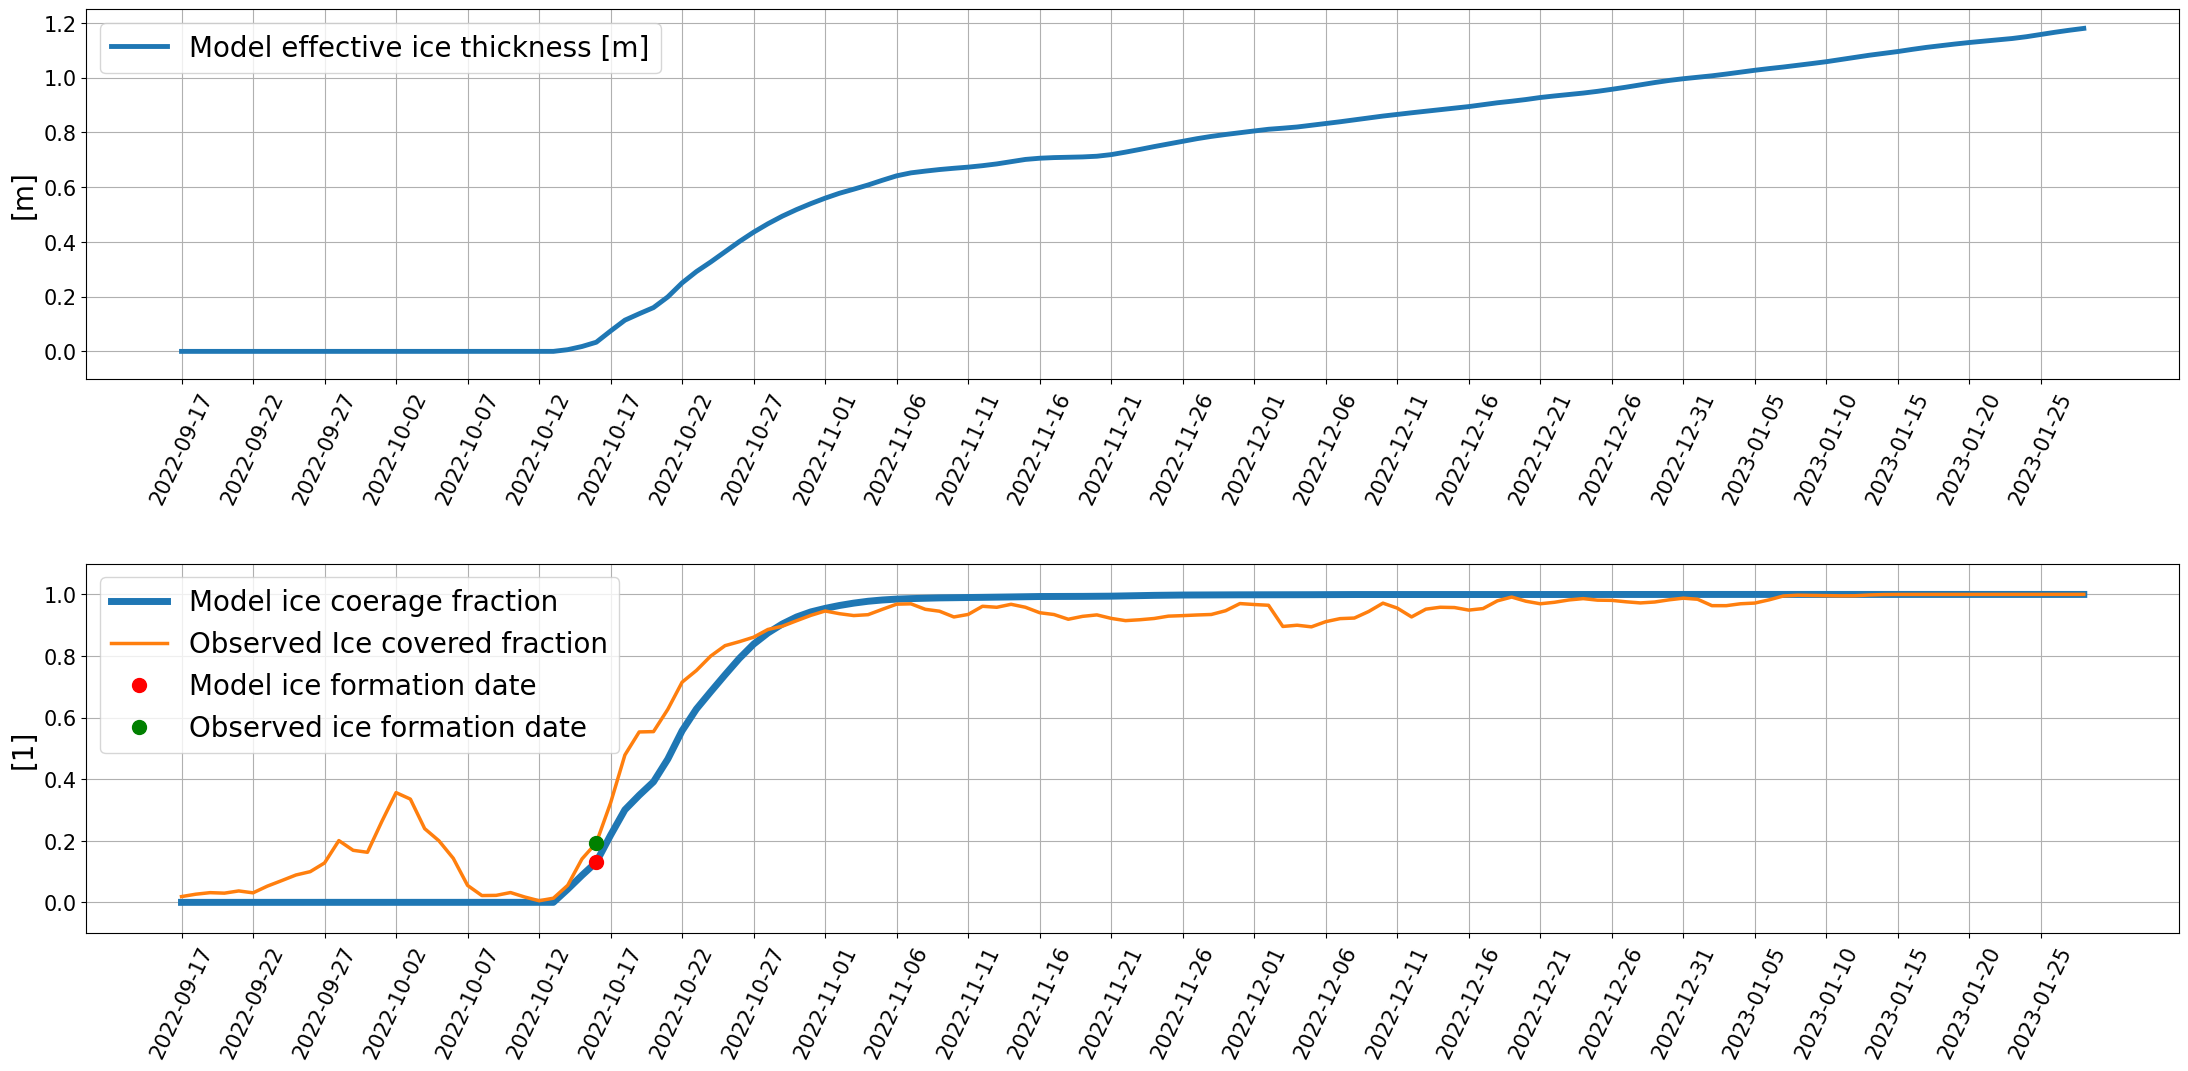

In [414]:
#-----------------------------------------------------------------------------------------------#
fig = plt.figure(figsize=[27,12], num=1);plt.clf();
fig.subplots_adjust(hspace=0.5)
plt.subplot(2,1,1)
#plt.plot([np.array(t[ti[iiceformObs]]),np.array(t[ti[iiceformObs]])],np.array([-0.1,1.1]),'--k')
#plt.plot([np.array(t[ti[iiceformMode]]),np.array(t[ti[iiceformMode]])],np.array([-0.1,1.1]),'--k')
plt.plot(t,np.squeeze(ice_thik),label='Model effective ice thickness [m]',linewidth=3.5)
#plt.plot(t[ti],IceFrac[ti],label='Observed Ice covered fraction')
plt.xticks(t[np.arange(0,t.size,5)],rotation=65,fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('[m]',fontsize=20)
plt.legend(fontsize=20)
plt.grid()
plt.ylim(-.1,1.25)
#-----------------------------------------------------------------------------------------------#
plt.subplot(2,1,2)
#fig = plt.figure(figsize=[25,6], num=2);plt.clf();
#plt.plot([np.array(t[ti[iiceformMode]]),np.array(t[ti[iiceformMode]])],np.array([-0.1,1.5]),'--k')
plt.plot(t,np.squeeze(ice_fraction),label='Model ice coerage fraction',linewidth=5)
#plt.plot([np.array(t[ti[iiceformObs]]),np.array(t[ti[iiceformObs]])],np.array([-0.1,1.5]),'--k')
plt.plot(t,IceFrac[ti],label='Observed Ice covered fraction',linewidth=2.5)
## Model ice formation date
plt.plot(t[a],np.squeeze(ice_fraction)[a],'or',markersize=10,label='Model ice formation date')
## observed ice formation date
plt.plot(t[b],IceFrac[ti][b],'og',markersize=10,label='Observed ice formation date')
plt.xticks(t[np.arange(0,t.size,5)],rotation=65,fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-0.1,1.1)
plt.grid()
plt.ylabel('[1]',fontsize=20)
plt.legend(fontsize=20)

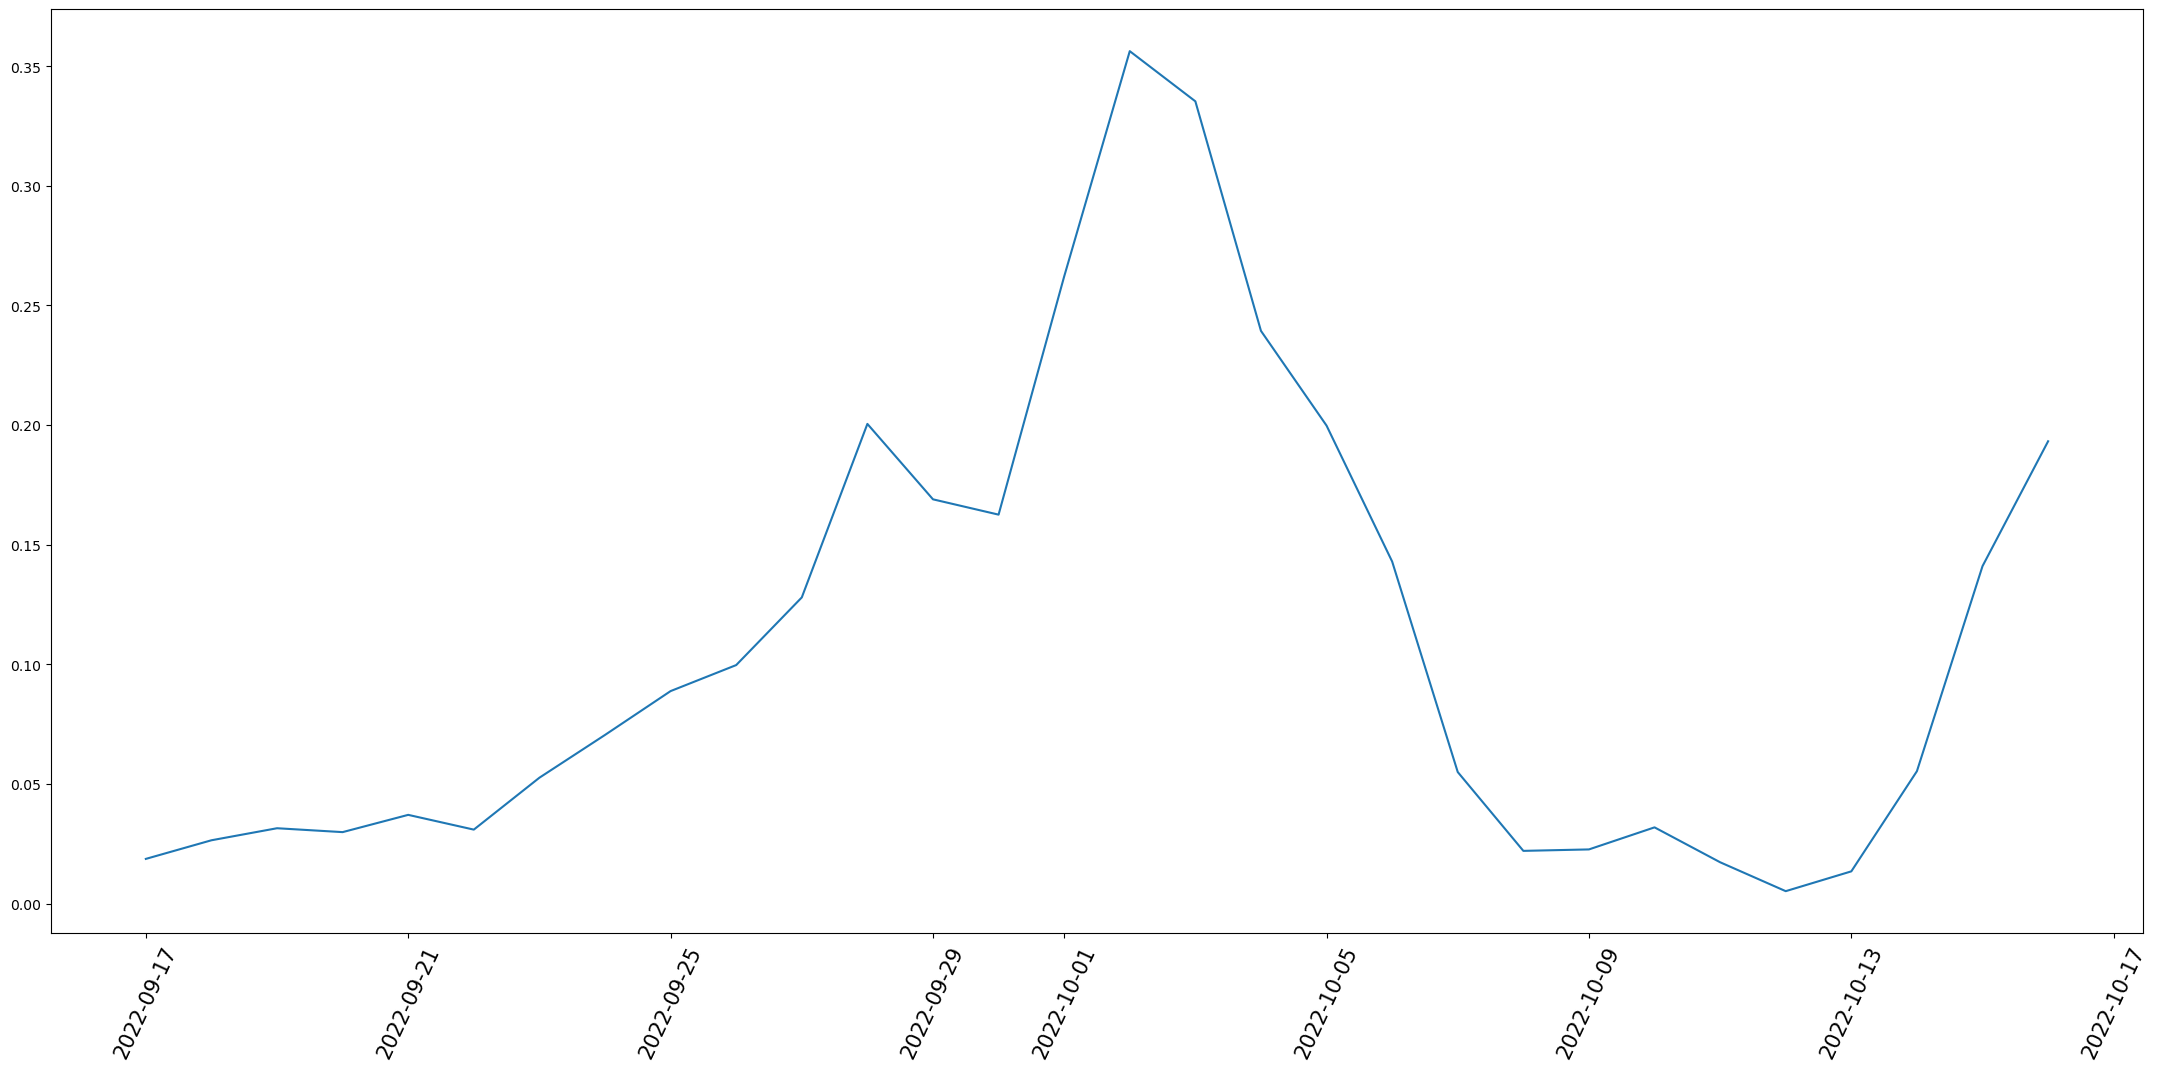

In [147]:
fig = plt.figure(figsize=[27,12], num=1);plt.clf();
plt.plot(t[0:b+1],IceFrac[ti][0:b+1])
tika = plt.xticks(rotation=65,fontsize=15);del(tika)

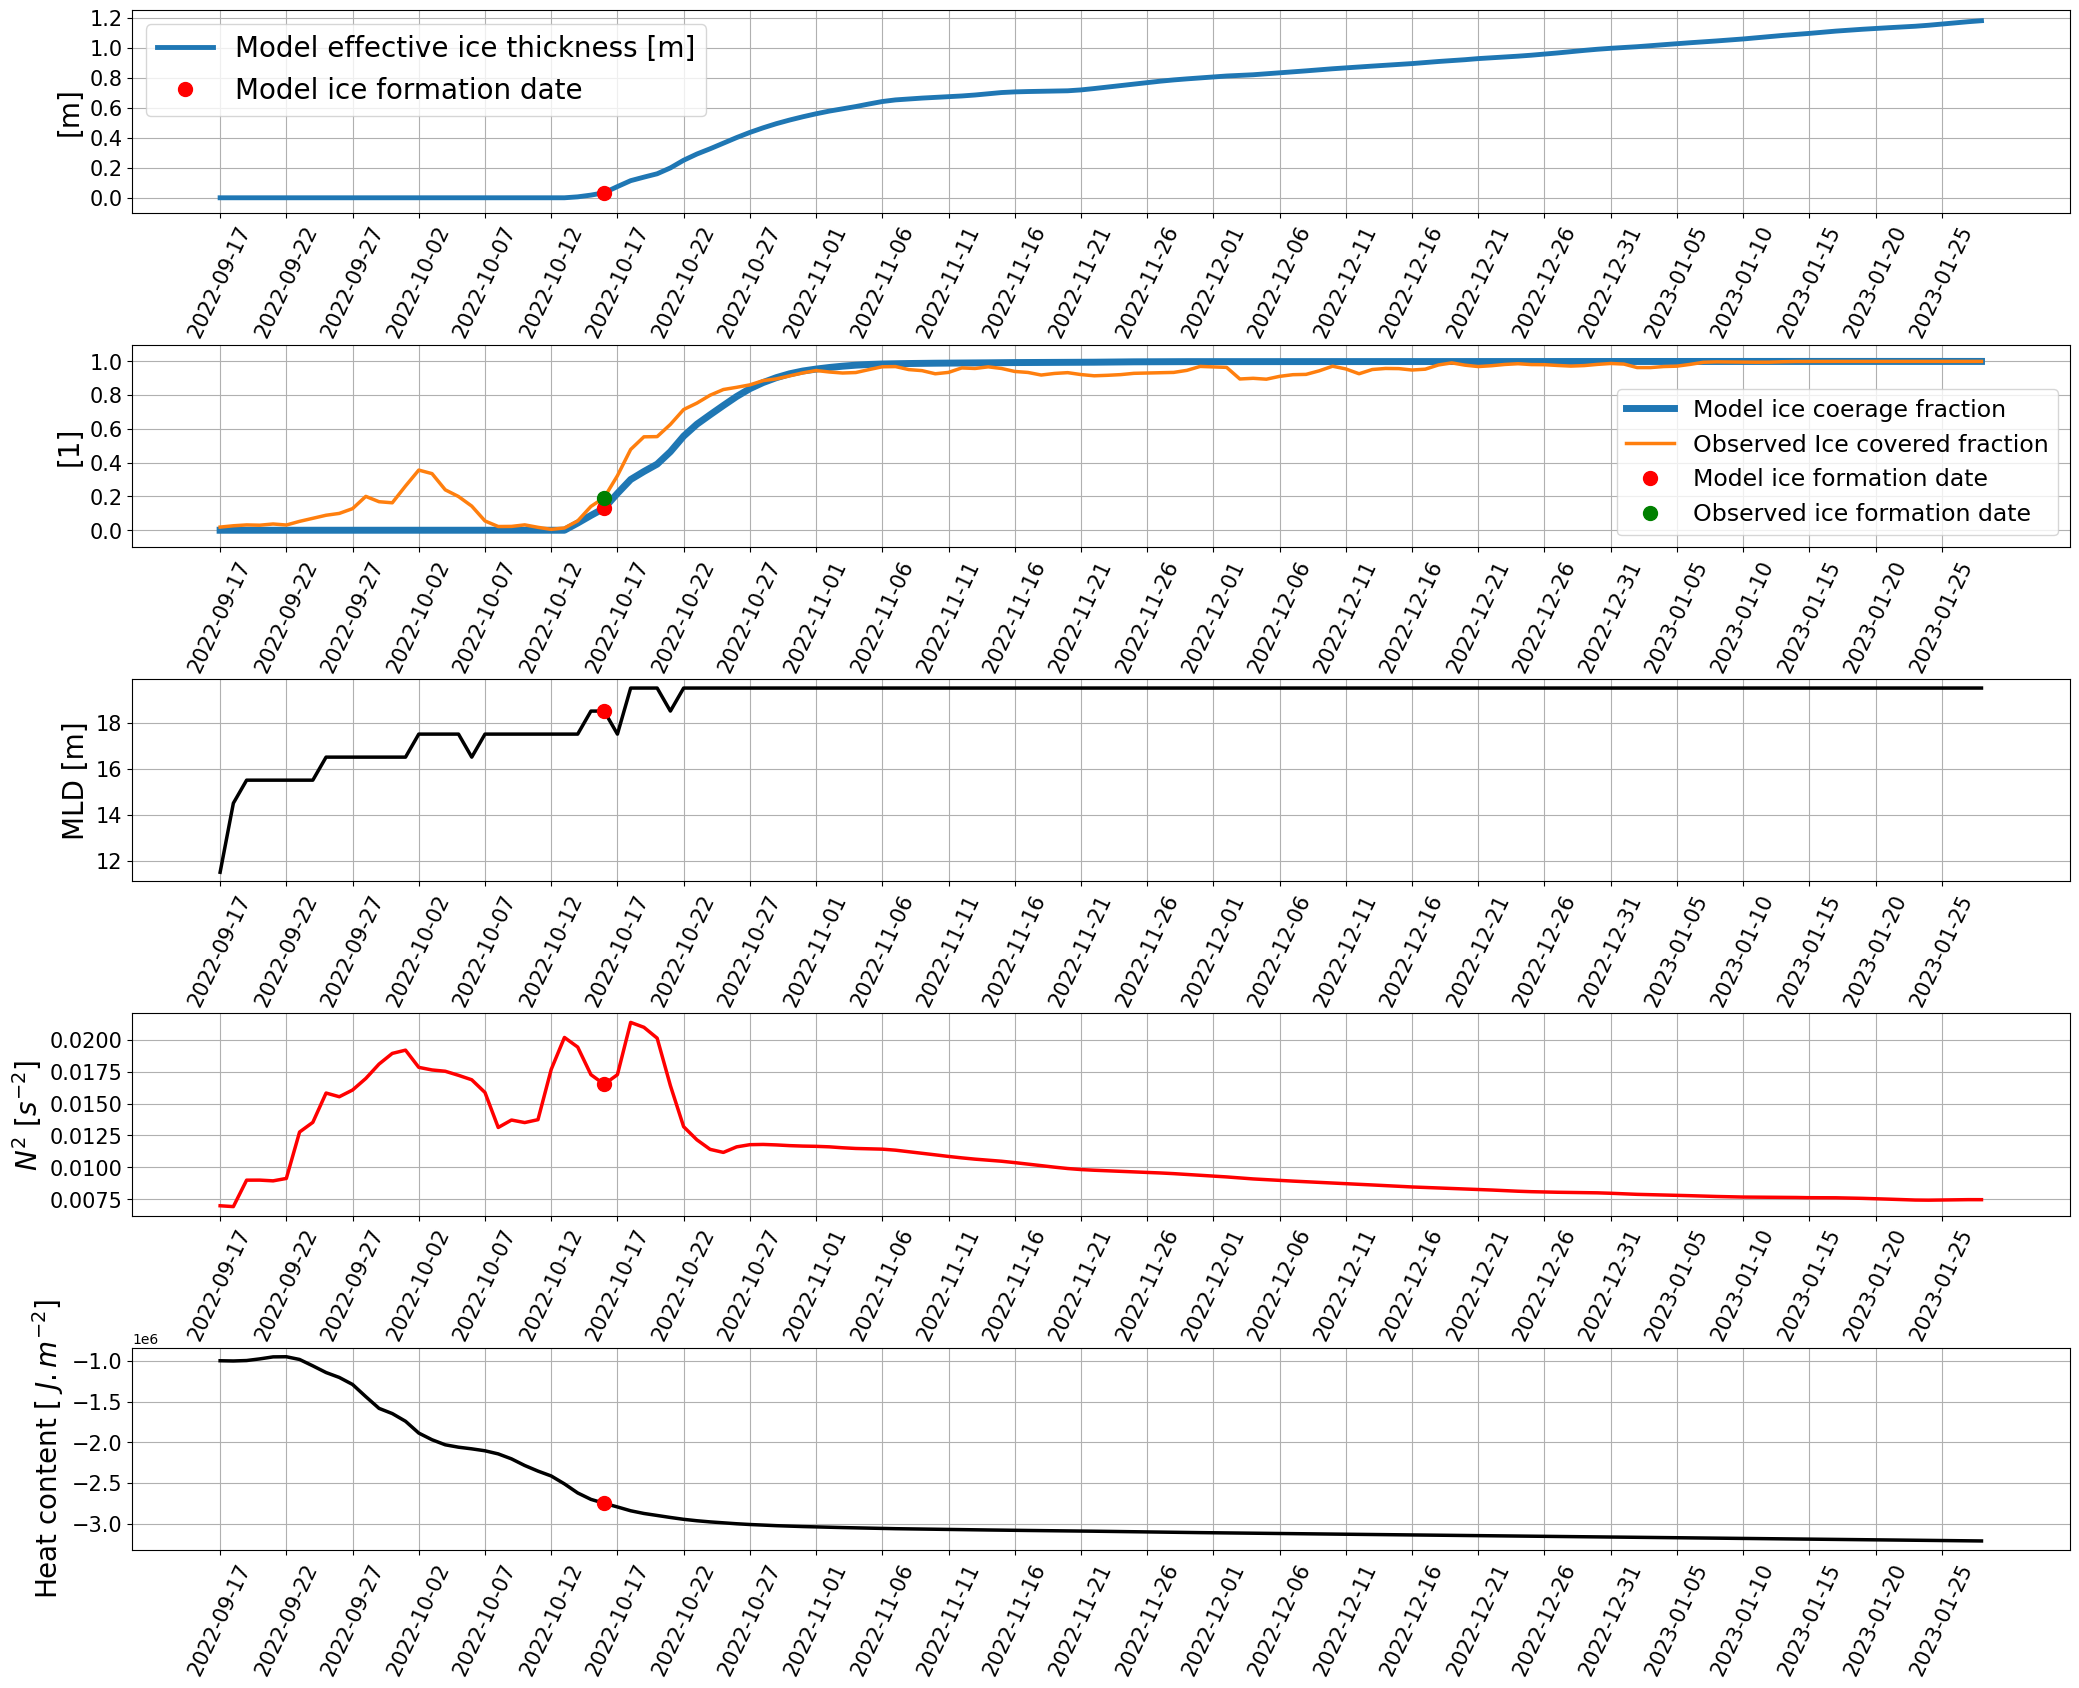

In [415]:
#-----------------------------------------------------------------------------------------------#
fig = plt.figure(figsize=[25,20], num=1);plt.clf();
fig.subplots_adjust(hspace=0.65)
plt.subplot(5,1,1)
#plt.plot([np.array(t[ti[iiceformObs]]),np.array(t[ti[iiceformObs]])],np.array([-0.1,1.1]),'--k')
#plt.plot([np.array(t[ti[iiceformMode]]),np.array(t[ti[iiceformMode]])],np.array([-0.1,1.1]),'--k')
plt.plot(t,np.squeeze(ice_thik),label='Model effective ice thickness [m]',linewidth=3.5)
## Model ice formation date
plt.plot(t[a],np.squeeze(ice_thik)[a],'or',markersize=10,label='Model ice formation date')

#plt.plot(t[ti],IceFrac[ti],label='Observed Ice covered fraction')
plt.xticks(t[np.arange(0,t.size,5)],rotation=65,fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('[m]',fontsize=20)
plt.legend(fontsize=20)
plt.grid()
plt.ylim(-.1,1.25)
#-----------------------------------------------------------------------------------------------#
plt.subplot(5,1,2)
#fig = plt.figure(figsize=[25,6], num=2);plt.clf();
#plt.plot([np.array(t[ti[iiceformMode]]),np.array(t[ti[iiceformMode]])],np.array([-0.1,1.5]),'--k')
plt.plot(t,np.squeeze(ice_fraction),label='Model ice coerage fraction',linewidth=5)
#plt.plot([np.array(t[ti[iiceformObs]]),np.array(t[ti[iiceformObs]])],np.array([-0.1,1.5]),'--k')
plt.plot(t,IceFrac[ti],label='Observed Ice covered fraction',linewidth=2.5)
## Model ice formation date
plt.plot(t[a],np.squeeze(ice_fraction)[a],'or',markersize=10,label='Model ice formation date')
## observed ice formation date
plt.plot(t[b],IceFrac[ti][b],'og',markersize=10,label='Observed ice formation date')
plt.xticks(t[np.arange(0,t.size,5)],rotation=65,fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-0.1,1.1)
plt.grid()
plt.ylabel('[1]',fontsize=20)
plt.legend(fontsize=17)
#-----------------------------------------------------------------------------------------------#
plt.subplot(5,1,3)
plt.plot(t,MLD,'-k',label='MLD',linewidth=2.5)
## Model ice formation date
plt.plot(t[a],MLD[a],'or',markersize=10,label='Model ice formation date')

plt.xticks(t[np.arange(0,t.size,5)],rotation=65,fontsize=15)
plt.ylabel('MLD [m]',fontsize=20)
plt.yticks(fontsize=15)
plt.grid()
#-----------------------------------------------------------------------------------------------#
plt.subplot(5,1,4)
plt.plot(t,N2max,'-r',label='MLD',linewidth=2.5)
## Model ice formation date
plt.plot(t[a],N2max[a],'or',markersize=10,label='Model ice formation date')

plt.xticks(t[np.arange(0,t.size,5)],rotation=65,fontsize=15)
plt.ylabel('$N^{2}$ [$s^{-2}$]',fontsize=20)
plt.yticks(fontsize=15)
plt.grid()
#-----------------------------------------------------------------------------------------------#
plt.subplot(5,1,5)
#fig = plt.figure(figsize=[25,6], num=2);plt.clf();
plt.plot(t,OHC,'-k',label='MLD',linewidth=2.5)
## Model ice formation date
plt.plot(t[a],OHC[a],'or',markersize=10,label='Model ice formation date')
plt.xticks(t[np.arange(0,t.size,5)],rotation=65,fontsize=15)
plt.ylabel('Heat content [ $J.m^{-2}$]',fontsize=20)
plt.yticks(fontsize=15)
plt.grid()

In [ ]:
nb_day = 3600*3600/(24*3600)-17
(nb_day*24*3600)/3600